In [1]:
import pandas as pd

Filter out the publication published outside the period 1559-1659.

Create a sub-dataset containing distinct publication information.

In [7]:
all_data = pd.read_csv('data/pub_filter.csv')

In [8]:
pub_row = all_data[['ODIS_ID', 'PUB_REF_TITLE', 'Language', 'Publication Year', 'Publication Period']]

In [9]:
pub_row.head()

,ODIS_ID,PUB_REF_TITLE,Language,Publication Year,Publication Period
0,35786,"Refutatio locorum communium theologicorum, Phi...",LATIN,1563.0,1560s
1,35914,Refutatio locorum communium theologicorum Phil...,LATIN,1563.0,1560s
2,36812,Refutatio locorum communium theologicorum Phil...,LATIN,1563.0,1560s
3,35786,"Refutatio locorum communium theologicorum, Phi...",LATIN,1563.0,1560s
4,35914,Refutatio locorum communium theologicorum Phil...,LATIN,1563.0,1560s


In [10]:
pub_dist = pub_row.drop_duplicates()

In [11]:
pub_dist.shape

(2936, 5)

In [12]:
pub_dist.head()

,ODIS_ID,PUB_REF_TITLE,Language,Publication Year,Publication Period
0,35786,"Refutatio locorum communium theologicorum, Phi...",LATIN,1563.0,1560s
1,35914,Refutatio locorum communium theologicorum Phil...,LATIN,1563.0,1560s
2,36812,Refutatio locorum communium theologicorum Phil...,LATIN,1563.0,1560s
5,35915,Oratio habita in sessione octava sacrosancti C...,LATIN,1563.0,1560s
6,35918,Regii vatis Davidis psalmi quinquaginta ordine...,LATIN,1565.0,1560s


In [13]:
# checking if there are still duplicates
pub_id = list(set([ID for ID in pub_dist['ODIS_ID']]))
len(pub_id) == len([ID for ID in pub_dist['ODIS_ID']])

True

In [14]:
# pub_dist.to_csv('data/dist_pub.csv', index = False)

Create a sub-dataset containing distinct person information.

In [15]:
per_row = all_data[['ODIS_PERS_ID',
                    'REL_PERS_REF_SURNAME',
                    'REL_PERS_REF_FIRST_NAME',
                    'Full Name',
                    'Birth Year',
                    'Birth Country',
                    'Birth Place',
                    'Death Year',
                    'Death Country',
                    'Death Place']].sort_values(by = 'ODIS_PERS_ID')

In [16]:
per_row.head()

,ODIS_PERS_ID,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,Full Name,Birth Year,Birth Country,Birth Place,Death Year,Death Country,Death Place
1746,53546,de Loyola,Ignatius,Ignatius de Loyola,1491.0,NaN,NaN,1556.0,NaN,NaN
1747,53546,de Loyola,Ignatius,Ignatius de Loyola,1491.0,NaN,NaN,1556.0,NaN,NaN
1748,53546,de Loyola,Ignatius,Ignatius de Loyola,1491.0,NaN,NaN,1556.0,NaN,NaN
4330,64493,Acx,Fernandus,Fernandus Acx,1839.0,BE,Pittem,NaN,NaN,NaN
4331,64493,Acx,Fernandus,Fernandus Acx,1839.0,BE,Pittem,NaN,NaN,NaN


In [17]:
# change countries abbreviation to full name
country_list = [country for country in per_row['Birth Country'] if not str(country) == 'nan']
for country in per_row['Death Country']:
    if not str(country) == 'nan':
        country_list.append(country)
country_list = list(set(country_list))
country_list.sort()

In [18]:
country_list

['AT', 'BE', 'CH', 'DE', 'ES', 'FR', 'GB', 'HR', 'IE', 'IT', 'NL', 'PT', 'VA']

In [19]:
country_index = {
    'AT': 'Austria',
    'BE': 'Belgium',
    'CH': 'Switzerland',
    'DE': 'Germany',
    'ES': 'Spain',
    'FR': 'France',
    'GB': 'Britain',
    'HR': 'Croatia',
    'IE': 'Ireland',
    'IT': 'Italy',
    'NL': 'Netherlands',
    'PT': 'Portugal',
    'VA': 'Vatican'
}

In [20]:
birth_country = []
for country in per_row['Birth Country']:
    if not str(country) == 'nan':
        birth_country.append(country_index[country])
    else:
        birth_country.append(None)
        
per_row['Birth Country'] = birth_country

In [21]:
death_country = []
for country in per_row['Death Country']:
    if not str(country) == 'nan':
        death_country.append(country_index[country])
    else:
        death_country.append(None)

per_row['Death Country'] = death_country

In [22]:
per_dist = per_row.drop_duplicates()

In [23]:
per_dist.shape

(2081, 10)

In [24]:
per_dist.head()

,ODIS_PERS_ID,REL_PERS_REF_SURNAME,REL_PERS_REF_FIRST_NAME,Full Name,Birth Year,Birth Country,Birth Place,Death Year,Death Country,Death Place
1746,53546,de Loyola,Ignatius,Ignatius de Loyola,1491.0,None,NaN,1556.0,None,NaN
4330,64493,Acx,Fernandus,Fernandus Acx,1839.0,Belgium,Pittem,NaN,None,NaN
1341,77188,Perrenot de Granvelle,Antonius,Antonius Perrenot de Granvelle,1517.0,France,France,1586.0,Spain,Madrid
6673,77190,Boonen,Jacobus,Jacobus Boonen,1573.0,Belgium,Antwerpen,1655.0,Belgium,Brussel
6274,94638,Malderus,Joannes,Joannes Malderus,1563.0,Belgium,Sint-Pieters-Leeuw,1633.0,Belgium,Antwerpen


In [25]:
# checking if there are still duplicates
per_id = list(set([ID for ID in per_dist['ODIS_PERS_ID']]))
len(per_id) == len([ID for ID in per_dist['ODIS_PERS_ID']])

True

Descriptive Statistics

In [27]:
meta = pd.read_csv('data/pub_filter.csv')

In [28]:
pub = pd.read_csv('data/dist_pub.csv')

In [29]:
per = pd.read_csv('data/dist_per.csv')

In [30]:
rel = pd.read_csv('data/pub_relation.csv')

In [31]:
# count of the whole dataset
len(meta)

8360

In [32]:
# count average number of person involved in each publication.
pub_dict = {}
for i in range(0, len(rel)):
    if not rel['ODIS_ID'][i] in pub_dict:
        pub_dict[rel['ODIS_ID'][i]] = [rel['ODIS_PERS_ID'][i]]
    else:
        pub_dict[rel['ODIS_ID'][i]].append(rel['ODIS_PERS_ID'][i])

pub_avg = []
for ID in pub_dict:
    pub_dict[ID] = list(set(pub_dict[ID]))
    pub_avg.append(len(pub_dict[ID]))

round(sum(pub_avg) / len(pub_avg), 2), sum(pub_avg), len(pub_avg)

(2.83, 8300, 2936)

In [33]:
# count average number of publications each person involved.
per_dict = {}
for i in range(0, len(rel)):
    if not rel['ODIS_PERS_ID'][i] in per_dict:
        per_dict[rel['ODIS_PERS_ID'][i]] = [rel['ODIS_ID'][i]]
    else:
        per_dict[rel['ODIS_PERS_ID'][i]].append(rel['ODIS_ID'][i])

per_avg = []
for ID in per_dict:
    per_dict[ID] = list(set(per_dict[ID]))
    per_avg.append(len(per_dict[ID]))

round(sum(per_avg) / len(per_avg), 2), sum(per_avg), len(per_avg)

(3.99, 8300, 2081)

Publication

In [34]:
# count of distinct publication
len(pub)

2936

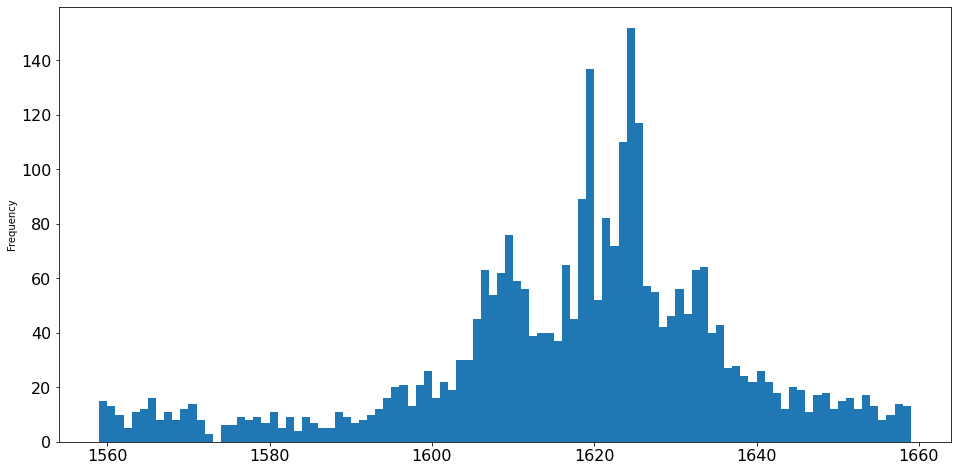

In [35]:
# distribution of publication year
overalltrend = pub['Publication Year'].plot.hist(bins = 100, figsize = (16, 8))
overalltrend.tick_params(axis='x', labelsize = 16)
overalltrend.tick_params(axis='y', labelsize = 16)

In [36]:
# no publication in this year
for i in range(1559, 1660):
    if i not in [year for year in pub['Publication Year']]:
        print(i)

1573


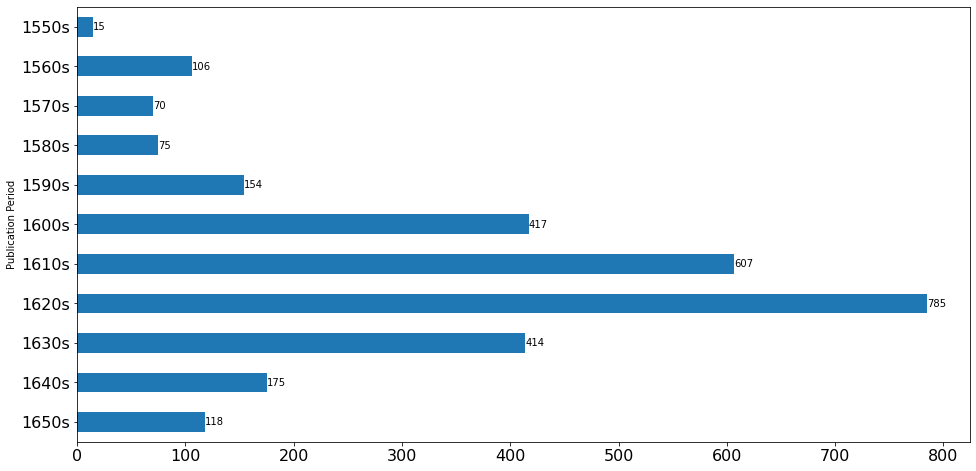

In [37]:
# bar chart group by period
pub_period_plot = pub['Publication Period'].value_counts().sort_index(ascending = False).plot.barh(figsize = (16, 8))
pub_period_plot.tick_params(axis='x', labelsize = 16)
pub_period_plot.tick_params(axis='y', labelsize = 16)

for container in pub_period_plot.containers:
    pub_period_plot.bar_label(container)

In [38]:
# count and % table
pub_table = pd.DataFrame()
period_name = list(set([period for period in pub['Publication Period']]))
period_name.sort()
pub_table['Period'] = period_name

pub_count = [count for count in pub['Publication Period'].value_counts().sort_index(ascending = True)]
pub_table['Count'] = pub_count

pub_pro = [round((count / len(pub)) * 100, 2) for count in pub_count]
pub_table['%'] = pub_pro

pub_table

,Period,Count,%
0,1550s,15,0.51
1,1560s,106,3.61
2,1570s,70,2.38
3,1580s,75,2.55
4,1590s,154,5.25
5,1600s,417,14.20
6,1610s,607,20.67
7,1620s,785,26.74
8,1630s,414,14.10
9,1640s,175,5.96


Person

In [39]:
# count of distinct person
len(per)

2081

In [40]:
# count of distinct countries they were from or to
countries = list(set([country for country in per['Birth Country'] if not str(country) == 'nan']))
for country in per['Death Country']:
    if not str(country) == 'nan':
        if not country in countries:
            countries.append(country)
countries.sort()
len(countries)

15

In [41]:
countries

['Austria',
 'Belgium',
 'Britain',
 'China',
 'Croatia',
 'France',
 'Germany',
 'Ireland',
 'Italy',
 'Netherlands',
 'Peru',
 'Portugal',
 'Spain',
 'Switzerland',
 'Vatican']

In [42]:
# total count of birth country (not distinct)
sum(per['Birth Country'].value_counts()), sum(per['Birth Country'].value_counts())/len(per)

(403, 0.19365689572321)

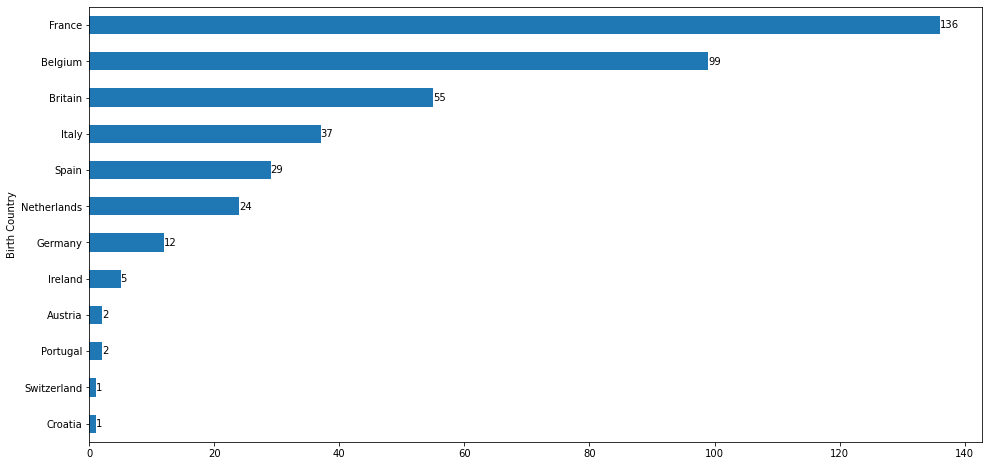

In [43]:
# count of birth country
birth_country_plot = per['Birth Country'].value_counts().sort_values().plot.barh(figsize = (16, 8))

for container in birth_country_plot.containers:
    birth_country_plot.bar_label(container)

In [44]:
# count and % table of birth country
birth_country_table = pd.DataFrame()
country_name = list(set([country for country in per['Birth Country'] if not str(country) == 'nan']))
country_name.sort()
birth_country_table['Country'] = country_name

birth_country_count = [count for count in per['Birth Country'].value_counts().sort_index(ascending = True)]
birth_country_table['Count'] = birth_country_count

birth_country_pro = [round((count / sum(per['Birth Country'].value_counts())) * 100, 2) for count in birth_country_count]
birth_country_table['%'] = birth_country_pro

birth_country_table.sort_values(by = 'Count', ascending = False)

,Country,Count,%
4,France,136,33.75
1,Belgium,99,24.57
2,Britain,55,13.65
7,Italy,37,9.18
10,Spain,29,7.20
8,Netherlands,24,5.96
5,Germany,12,2.98
6,Ireland,5,1.24
0,Austria,2,0.50
9,Portugal,2,0.50


In [45]:
# count of distinct birth place
len(list(set(per['Birth Place'])))

260

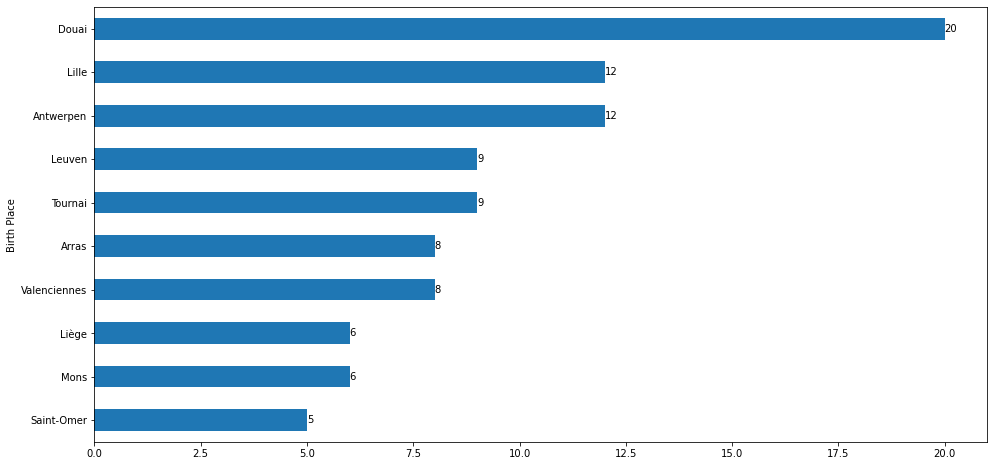

In [46]:
# count of birth place
birth_place = per['Birth Place'].value_counts().sort_values(ascending = False).head(10)
birth_place_plot = birth_place.sort_values().plot.barh(figsize = (16, 8))

for container in birth_place_plot.containers:
    birth_place_plot.bar_label(container)

In [47]:
# total count of death country (not distinct)
sum(per['Death Country'].value_counts()), sum(per['Death Country'].value_counts())/len(per)

(393, 0.18885151369533879)

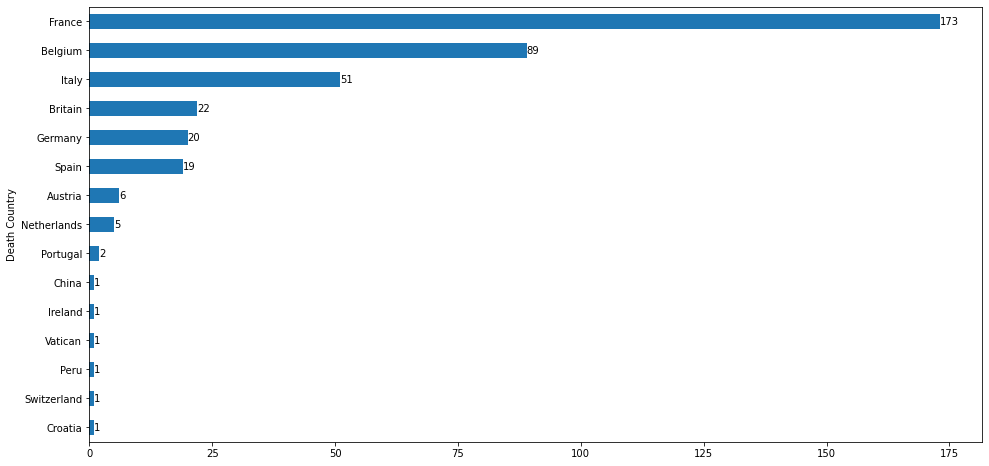

In [48]:
# count of death country
death_country_plot = per['Death Country'].value_counts().sort_values().plot.barh(figsize = (16, 8))

for container in death_country_plot.containers:
    death_country_plot.bar_label(container)

In [49]:
# count and % table of death country
death_country_table = pd.DataFrame()
country_name = list(set([country for country in per['Death Country'] if not str(country) == 'nan']))
country_name.sort()
death_country_table['Country'] = country_name

death_country_count = [count for count in per['Death Country'].value_counts().sort_index(ascending = True)]
death_country_table['Count'] = death_country_count

death_country_pro = [round((count / sum(per['Death Country'].value_counts())) * 100, 2) for count in death_country_count]
death_country_table['%'] = death_country_pro

death_country_table.sort_values(by = 'Count', ascending = False)

,Country,Count,%
5,France,173,44.02
1,Belgium,89,22.65
8,Italy,51,12.98
2,Britain,22,5.60
6,Germany,20,5.09
12,Spain,19,4.83
0,Austria,6,1.53
9,Netherlands,5,1.27
11,Portugal,2,0.51
3,China,1,0.25


In [50]:
country_graph = pd.merge(birth_country_table, death_country_table, on = 'Country', how = 'right')
country_graph = country_graph.rename(columns = {'Count_x': 'Birth Count', 'Count_y': 'Death Count'})
country_graph = country_graph[['Country', 'Birth Count', 'Death Count']]
country_graph = country_graph.set_index('Country').sort_values('Birth Count', ascending = False)
# country_graph = country_graph.head(10)
country_graph = country_graph.fillna(0)

In [51]:
country_graph

,Birth Count,Death Count
Country,,
France,136.0,173
Belgium,99.0,89
Britain,55.0,22
Italy,37.0,51
Spain,29.0,19
Netherlands,24.0,5
Germany,12.0,20
Ireland,5.0,1
Austria,2.0,6


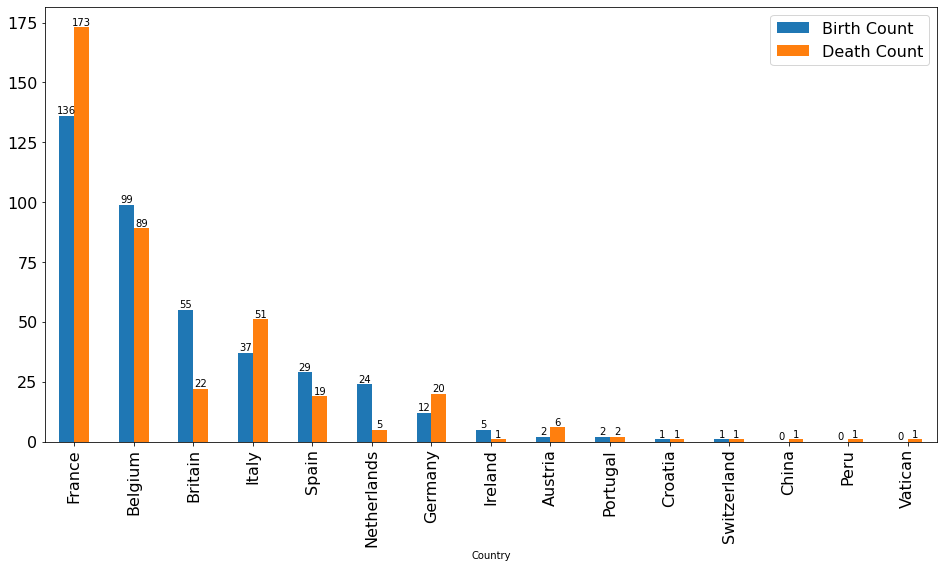

In [52]:
country_graph_plot = country_graph.plot.bar(figsize = (16, 8))
country_graph_plot.tick_params(axis='x', labelsize = 16)
country_graph_plot.tick_params(axis='y', labelsize = 16)
country_graph_plot.legend(fontsize = 16)

for container in country_graph_plot.containers:
    country_graph_plot.bar_label(container)

In [53]:
# count of distinct death place
len(list(set(per['Death Place'])))

121

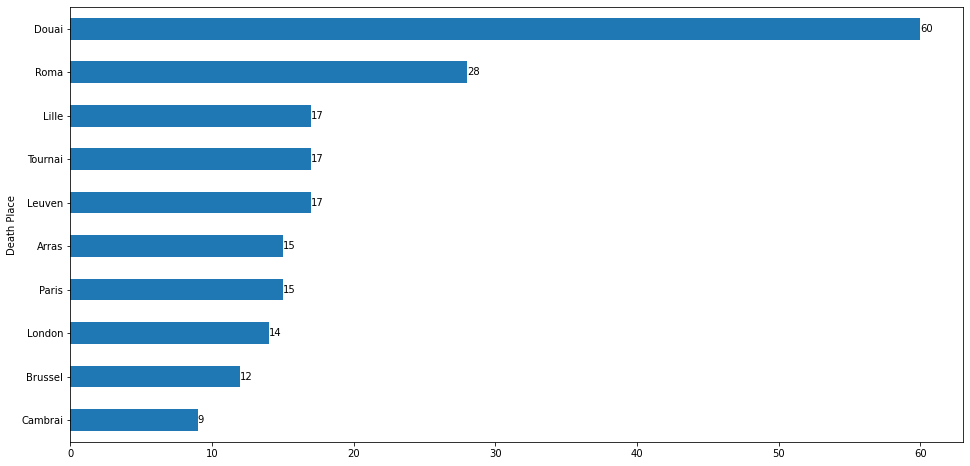

In [54]:
# count of death place
death_place = per['Death Place'].value_counts().sort_values(ascending = False).head(10)
death_place_plot = death_place.sort_values().plot.barh(figsize = (16, 8))

for container in death_place_plot.containers:
    death_place_plot.bar_label(container)

In [55]:
from statsmodels.stats.proportion import proportions_ztest

In [56]:
# z-test of Britain
z_score, p_value = proportions_ztest([55, 22], [403, 391])
z_score, p_value

(3.818362207070789, 0.0001343405859621092)

Relation

In [57]:
rel.shape

(8404, 6)

In [58]:
rel.head()

,ODIS_ID,REL_TYPE,Relation,Relation Cluster,Relation Note,ODIS_PERS_ID
0,35786,author,author,author,NaN,119246
1,35914,author,author,author,NaN,119246
2,36812,author,author,author,NaN,119246
3,35786,printer,printer,printer/publisher,NaN,119215
4,35914,printer,printer,printer/publisher,NaN,119215


In [59]:
# count of distinct relation
len(list(set([relation for relation in rel['Relation']])))

25

In [60]:
# count of distinct relation cluster
len(list(set([relation for relation in rel['Relation Cluster']])))

12

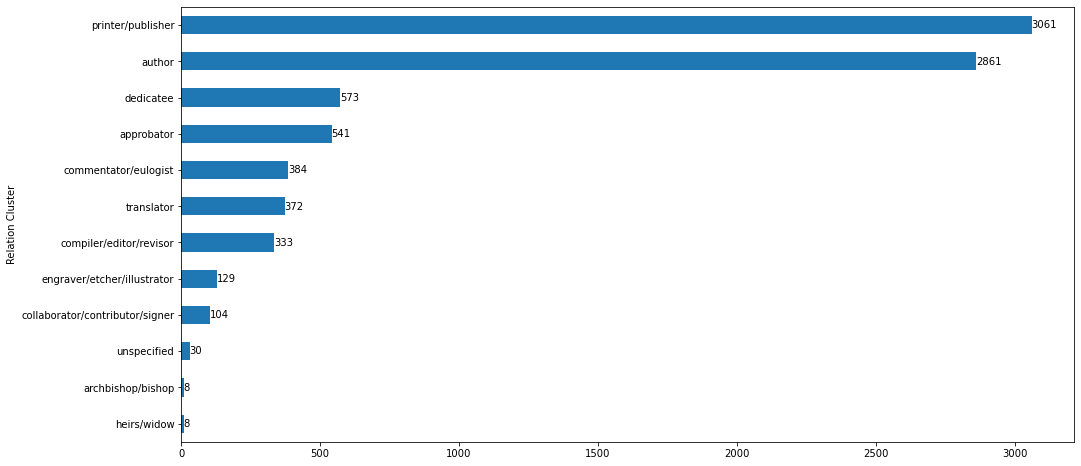

In [61]:
# count of relation cluster (publication level)
relation_pub_plot = rel['Relation Cluster'].value_counts().sort_values().plot.barh(figsize = (16, 8))

for container in relation_pub_plot.containers:
    relation_pub_plot.bar_label(container)

In [62]:
# count and % table of relation cluster (publication level)
relation_pub_table = pd.DataFrame()
relation_pub_name = list(set([relation for relation in rel['Relation Cluster'] if not str(relation) == 'nan']))
relation_pub_name.sort()
relation_pub_table['Relation'] = relation_pub_name

relation_pub_count = [count for count in rel['Relation Cluster'].value_counts().sort_index(ascending = True)]
relation_pub_table['Count'] = relation_pub_count

relation_pub_pro = [round((count / sum(rel['Relation Cluster'].value_counts())) * 100, 2) for count in relation_pub_count]
relation_pub_table['%'] = relation_pub_pro

relation_pub_table.sort_values(by = 'Count', ascending = False)

,Relation,Count,%
9,printer/publisher,3061,36.42
2,author,2861,34.04
6,dedicatee,573,6.82
0,approbator,541,6.44
4,commentator/eulogist,384,4.57
10,translator,372,4.43
5,compiler/editor/revisor,333,3.96
7,engraver/etcher/illustrator,129,1.53
3,collaborator/contributor/signer,104,1.24
11,unspecified,30,0.36


In [63]:
# create dictionary storing relation cluster of each person
relation_dict = {}
for i in range(0, len(rel)):
    if not rel['Relation Cluster'][i] in relation_dict:
        relation_dict[rel['Relation Cluster'][i]] = [rel['ODIS_PERS_ID'][i]]
    else:
        if not rel['ODIS_PERS_ID'][i] in relation_dict[rel['Relation Cluster'][i]]:
            relation_dict[rel['Relation Cluster'][i]].append(rel['ODIS_PERS_ID'][i])

In [64]:
# count and % table of relation cluster (person level)
relation_per_table = pd.DataFrame()
relation_per_name = list(set([relation for relation in rel['Relation Cluster'] if not str(relation) == 'nan']))
relation_per_name.sort()
relation_per_table['Relation'] = relation_per_name

relation_per_count = []
for name in relation_per_name:
    relation_per_count.append(len(relation_dict[name]))
relation_per_table['Count'] = relation_per_count

relation_per_pro = [round((count / len(per)) * 100, 2) for count in relation_per_count]
relation_per_table['%'] = relation_per_pro

relation_per_table.sort_values(by = 'Count', ascending = False)

,Relation,Count,%
2,author,1220,58.63
6,dedicatee,323,15.52
4,commentator/eulogist,229,11.00
10,translator,147,7.06
5,compiler/editor/revisor,138,6.63
9,printer/publisher,105,5.05
3,collaborator/contributor/signer,94,4.52
0,approbator,91,4.37
11,unspecified,25,1.20
7,engraver/etcher/illustrator,22,1.06


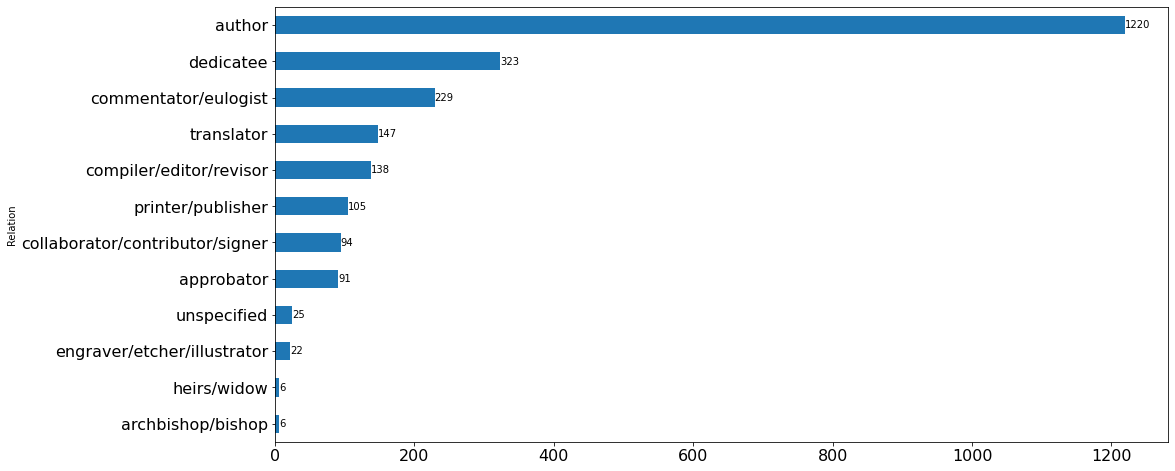

In [65]:
relation_per_plot = relation_per_table.sort_values(by = 'Count').plot.barh(x = 'Relation', 
                                                                           y = 'Count', 
                                                                           figsize = (16, 8), 
                                                                           legend = False)
relation_per_plot.tick_params(axis='x', labelsize = 16)
relation_per_plot.tick_params(axis='y', labelsize = 16)

for container in relation_per_plot.containers:
    relation_per_plot.bar_label(container)

In [66]:
# count and % table of relation cluster (compare)
relation_com_table = pd.merge(relation_pub_table, relation_per_table, on = 'Relation')
com = []
for i in range(0, len(relation_com_table)):
    com.append(round(relation_com_table['Count_x'][i] / relation_com_table['Count_y'][i], 2))
relation_com_table['per person'] = com
relation_com_table.sort_values(by = 'per person', ascending = False)

,Relation,Count_x,%_x,Count_y,%_y,per person
9,printer/publisher,3061,36.42,105,5.05,29.15
0,approbator,541,6.44,91,4.37,5.95
7,engraver/etcher/illustrator,129,1.53,22,1.06,5.86
10,translator,372,4.43,147,7.06,2.53
5,compiler/editor/revisor,333,3.96,138,6.63,2.41
2,author,2861,34.04,1220,58.63,2.35
6,dedicatee,573,6.82,323,15.52,1.77
4,commentator/eulogist,384,4.57,229,11.00,1.68
1,archbishop/bishop,8,0.10,6,0.29,1.33
8,heirs/widow,8,0.10,6,0.29,1.33


In [67]:
# total
round(sum([count for count in relation_com_table['Count_x']]) / sum([count for count in relation_com_table['Count_y']]), 2)

3.49